In [129]:
import pandas as pd
import numpy as np
from statistics import mode
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. Carga los datos y genera un dataFrame que excluya las columnas correspondientes a la abreviatura del país, código de llamada, capital, código de moneda, ciudad más
#grande, lenguaje oficial, latitud y longitud. Considerando estos datos, realiza una inspección inicial sobre ellos, considerando gráficos. Concluye.


In [216]:
df = pd.read_csv("C:/Users/Lenovo/anaconda3/world-data-2023.csv")
df.head(3)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626


In [217]:
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [219]:
df_final = df.drop(['Abbreviation','Calling Code', 'Capital/Major City','Currency-Code',  'Largest city','Official language', 'Latitude',
       'Longitude'], axis=1)
df_final.head(0)

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population


In [220]:
df_final.apply(lambda x: sum(x.isnull()), axis=0)

Country                                       0
Density\n(P/Km2)                              0
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Life expectancy                               8
Maternal mortality ratio                     14
Minimum wage                                 45
Out of pocket health expenditure              7
Physicians per thousand                 

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


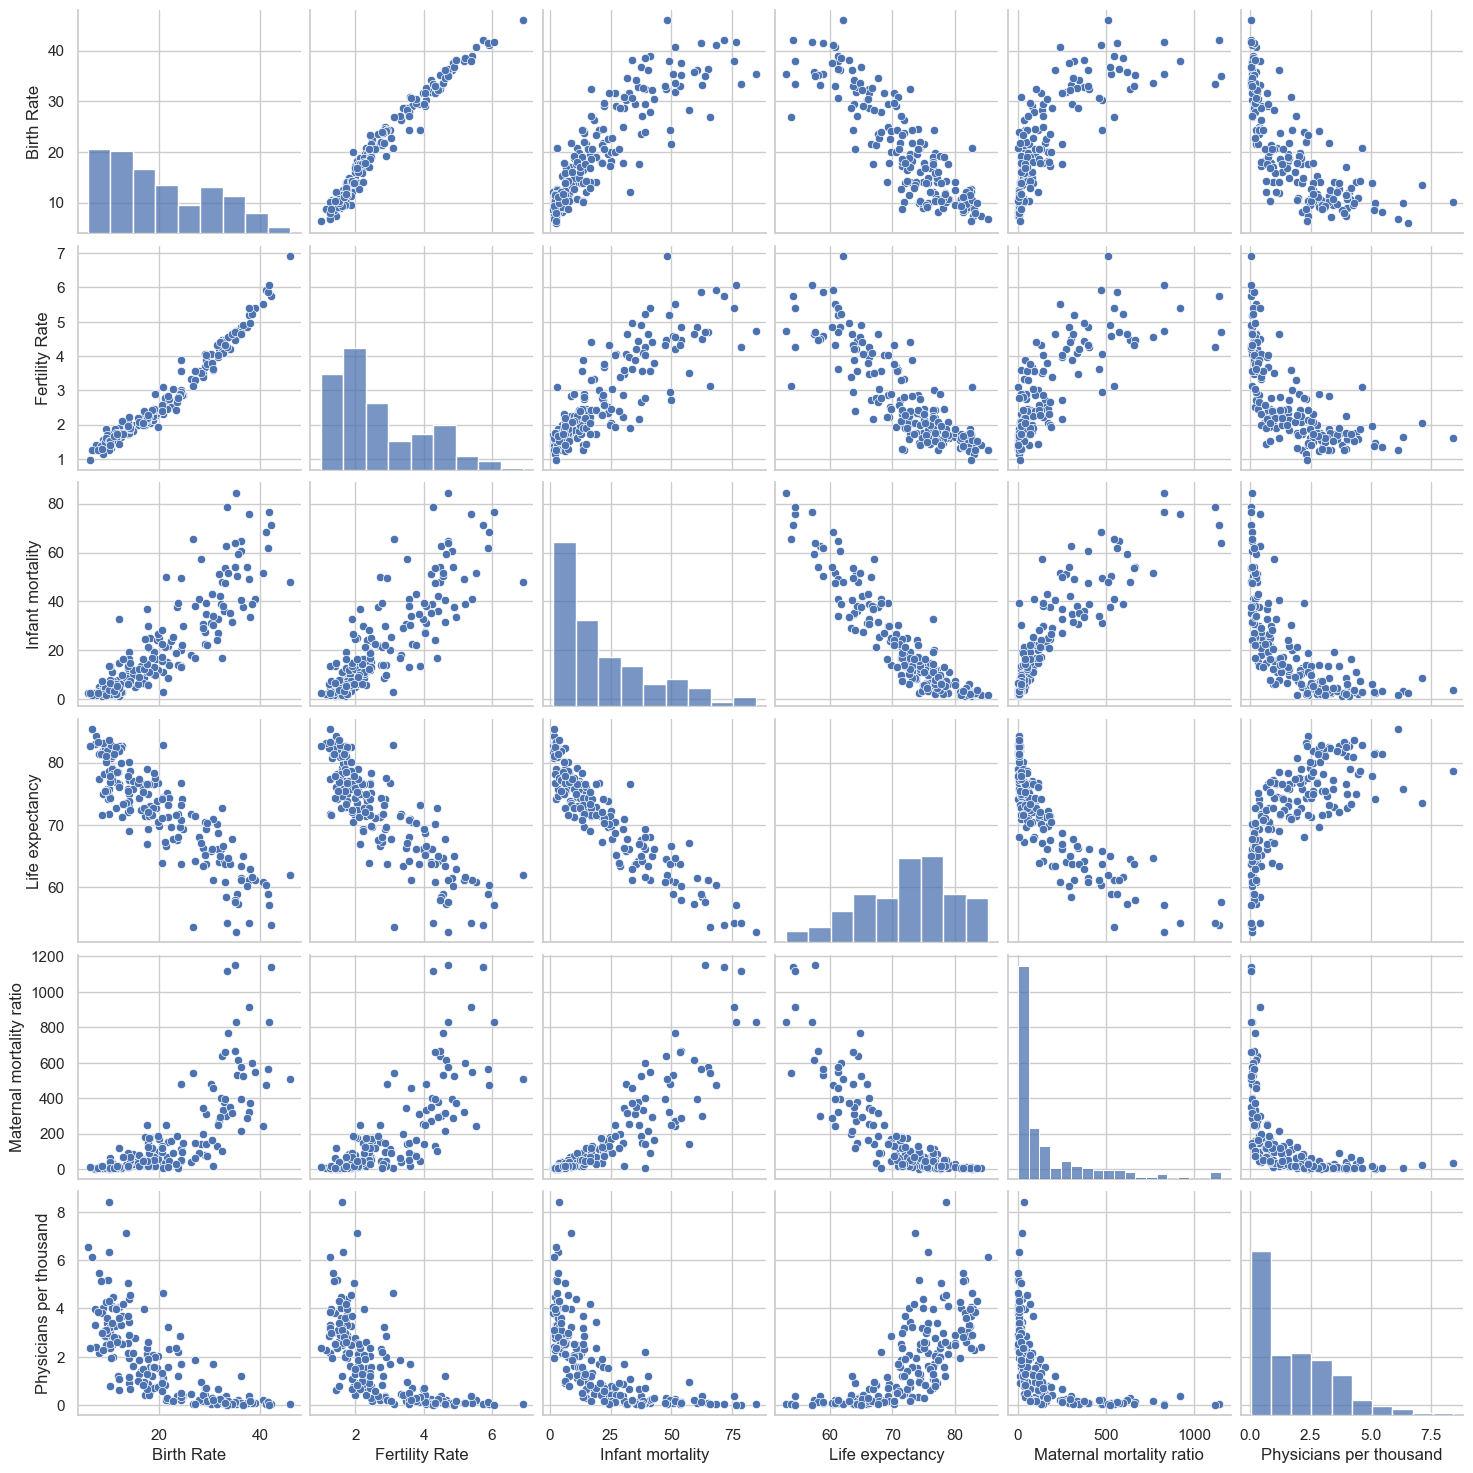

In [221]:
sns.pairplot(df_final)

In [ ]:
# Se observa que existen tanto corrrelación positiva y negativa entre varios de los pares de variables del dataframe. 
# Asi tambien se observan valores nulos, que necesitan ser tratados en los siguientes puntos.

In [ ]:
# 2. De las variables codificadas numéricamente, ¿hay pares de ellas en la que parezca haber correlación? ¿Para cuál(es) de ellas se observa más claramente?. Elige 2 pares
# de variables.

# De gráfica anterior se eligen: BithRate - Fertilite Rate y  Life expectancy - Infanty -Mortality





In [ ]:
#3. Considera los dos pares de variables anteriores y elimina en cada caso los faltantes y atípicos. 
# Justifica en cada caso tu procedimiento.

In [222]:
# BithRate - Fertilite Rate 
# Elimnamos los datos faltantes 
df_pregunta3 = df_final.loc[:,['Birth Rate','Fertility Rate']]
df_pregunta3=df_pregunta3.dropna()

In [223]:
df_pregunta3.apply(lambda x: sum(x.isnull()), axis=0)

Birth Rate        0
Fertility Rate    0
dtype: int64

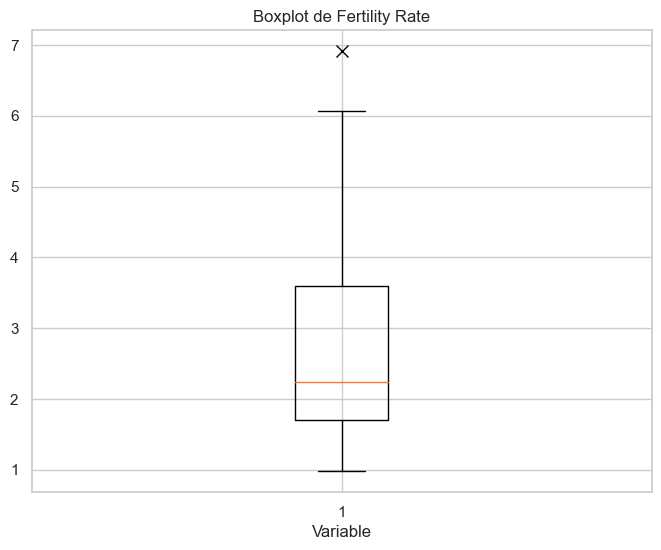

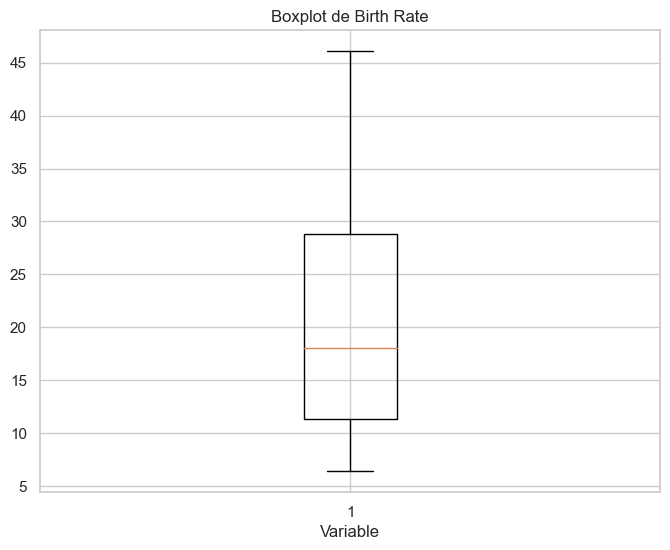

In [224]:
# Analisis de puntos atipicos
plt.figure(figsize=(8, 6))
plt.boxplot(df_pregunta3['Fertility Rate'], vert=True, flierprops=dict(marker='x', markersize=8, markerfacecolor='red', linestyle='none'))
plt.xlabel('Variable')
plt.title('Boxplot de Fertility Rate')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df_pregunta3['Birth Rate'], vert=True, flierprops=dict(marker='x', markersize=8, markerfacecolor='red', linestyle='none'))
plt.xlabel('Variable')
plt.title('Boxplot de Birth Rate')
plt.show()

In [225]:
def eliminar_atipicos(df):
    # Calcular el rango intercuartil (IQR) para cada columna
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para detectar valores atípicos
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Encontrar valores atípicos
    valores_atipicos = (df < lim_inf) | (df > lim_sup)

    # Eliminar valores atípicos
    df_sin_atipicos = df[~valores_atipicos.any(axis=1)]
    
    return df_sin_atipicos

In [226]:
df_pregunta3_sin_atipicos = eliminar_atipicos(df_pregunta3)

<Axes: >

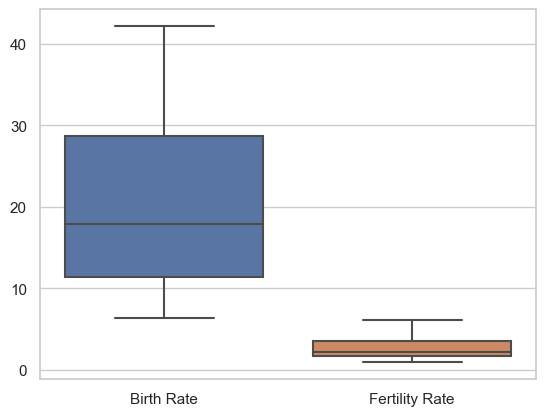

In [227]:
sns.boxplot(df_pregunta3_sin_atipicos)

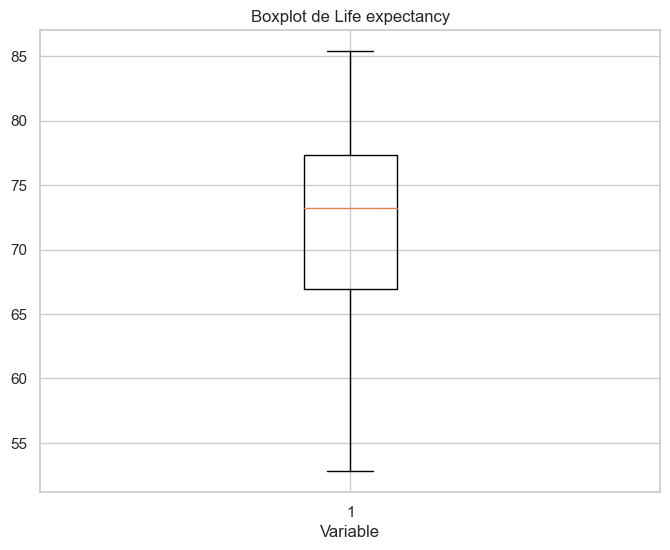

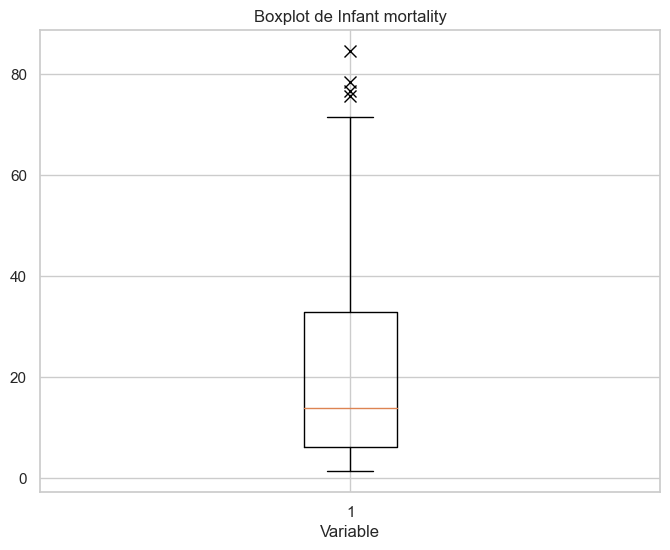

In [229]:
# De manera similiar para Life expectancy - Infanty -Mortality

# BithRate - Fertilite Rate 
# Elimnamos los datos faltantes 
df_pregunta3_1 = df_final.loc[:,['Life expectancy','Infant mortality']]
df_pregunta3_1=df_pregunta3_1.dropna()

# Analisis de puntos atipicos
plt.figure(figsize=(8, 6))
plt.boxplot(df_pregunta3_1['Life expectancy'], vert=True, flierprops=dict(marker='x', markersize=8, markerfacecolor='red', linestyle='none'))
plt.xlabel('Variable')
plt.title('Boxplot de Life expectancy')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df_pregunta3_1['Infant mortality'], vert=True, flierprops=dict(marker='x', markersize=8, markerfacecolor='red', linestyle='none'))
plt.xlabel('Variable')
plt.title('Boxplot de Infant mortality')
plt.show()

In [230]:
df_pregunta3_1_sin_atipicos = eliminar_atipicos(df_pregunta3_1)

<Axes: >

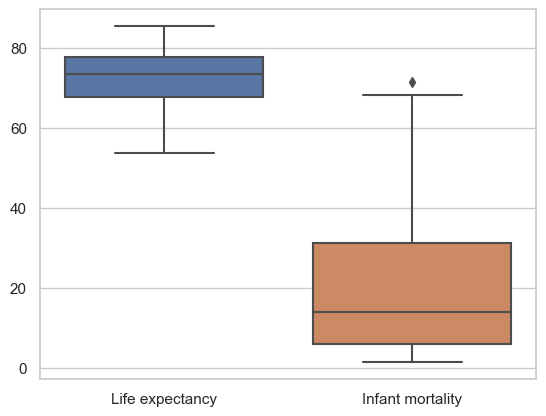

In [231]:
sns.boxplot(df_pregunta3_1_sin_atipicos)

In [232]:
print(df_pregunta3_1)

     Life expectancy  Infant mortality
0               64.5              47.9
1               78.5               7.8
2               76.7              20.1
4               60.8              51.6
5               76.9               5.0
..               ...               ...
190             72.1              21.4
191             75.3              16.5
192             66.1              42.9
193             63.5              40.4
194             61.2              33.9

[186 rows x 2 columns]


In [233]:
print(df_pregunta3_1_sin_atipicos)

     Life expectancy  Infant mortality
0               64.5              47.9
1               78.5               7.8
2               76.7              20.1
4               60.8              51.6
5               76.9               5.0
..               ...               ...
190             72.1              21.4
191             75.3              16.5
192             66.1              42.9
193             63.5              40.4
194             61.2              33.9

[182 rows x 2 columns]


In [ ]:
#4. Construye un gráfico para verificar la correlación entre estas variables, ahora con los datos preparados. Compara con lo obtenido anteriormente.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25144\3191094728.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Fertility Rate', y='Birth Rate', data=df_sin_atipicos, palette='Set2')


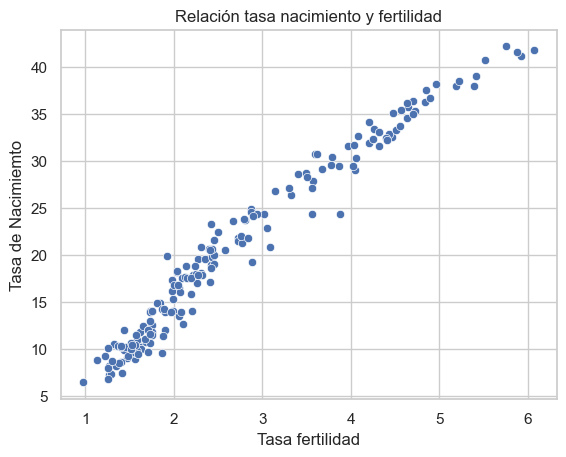

In [99]:
# Ahora graficamos.

sns.set(style='whitegrid')
sns.scatterplot(x='Fertility Rate', y='Birth Rate', data=df_sin_atipicos, palette='Set2')
plt.xlabel('Tasa fertilidad')
plt.ylabel('Tasa de Nacimiemto')
plt.title('Relación tasa nacimiento y fertilidad')
plt.show()

In [ ]:
# Ya que en gráfico original existian gran correlación aca solo se comprueba ya lo afirmado.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25144\2920923340.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Life expectancy', y='Infant mortality', data=df_pregunta3_1_sin_atipicos, palette='Set2')


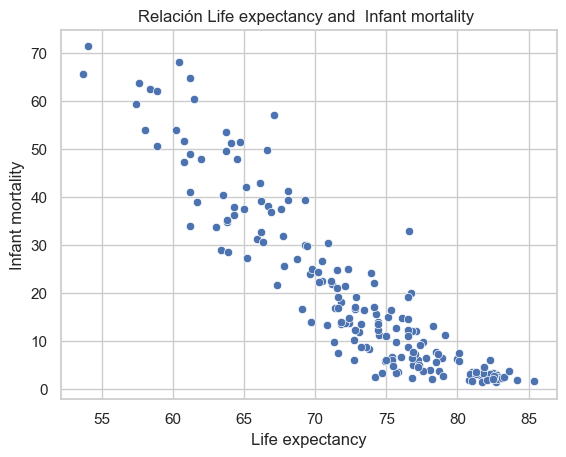

In [100]:
sns.set(style='whitegrid')
sns.scatterplot(x='Life expectancy', y='Infant mortality', data=df_pregunta3_1_sin_atipicos, palette='Set2')
plt.xlabel('Life expectancy')
plt.ylabel('Infant mortality')
plt.title('Relación Life expectancy and  Infant mortality ')
plt.show()

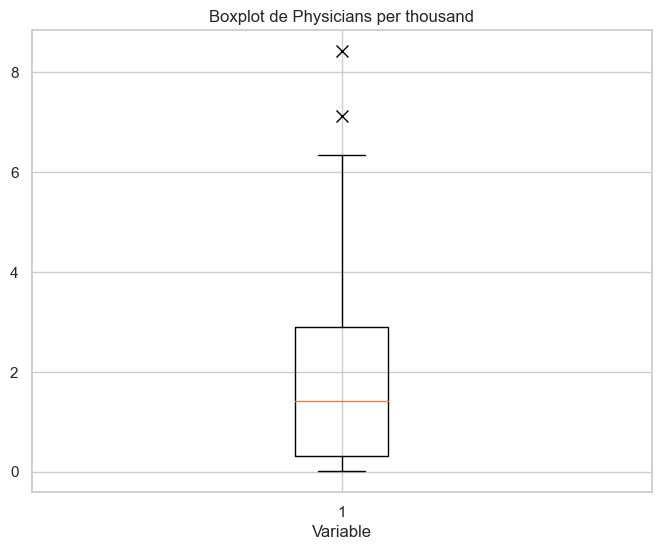

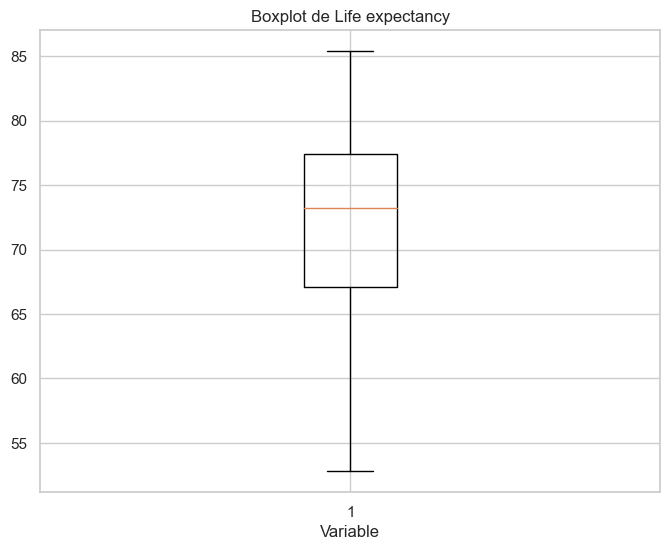

In [103]:
#5.- Realiza lo mismo para comparar la cantidad de médicos por cada mil personas y la esperanza de vida. ¿Qué puedes concluir?
 
# Elimnamos los datos faltantes 
df_pregunta5 = df_final.loc[:,['Physicians per thousand','Life expectancy']]
df_pregunta5=df_pregunta5.dropna()


# Analisis de puntos atipicos
plt.figure(figsize=(8, 6))
plt.boxplot(df_pregunta5['Physicians per thousand'], vert=True, flierprops=dict(marker='x', markersize=8, markerfacecolor='red', linestyle='none'))
plt.xlabel('Variable')
plt.title('Boxplot de Physicians per thousand')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df_pregunta5['Life expectancy'], vert=True, flierprops=dict(marker='x', markersize=8, markerfacecolor='red', linestyle='none'))
plt.xlabel('Variable')
plt.title('Boxplot de Life expectancy')
plt.show()

In [104]:
# sacar valores atipicos.

df_pregunta5_sin_atipicos = eliminar_atipicos(df_pregunta5)

<Axes: >

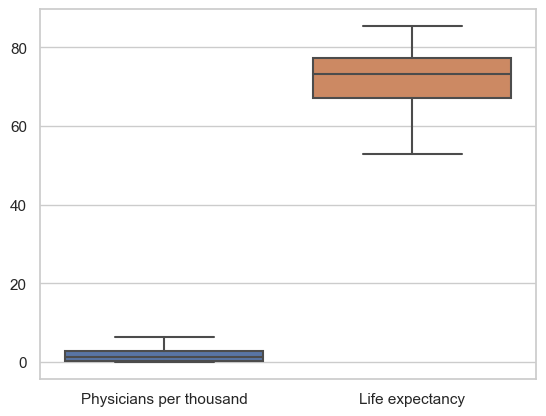

In [105]:
sns.boxplot(df_pregunta5_sin_atipicos)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25144\1170782233.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Physicians per thousand', y='Life expectancy', data=df_pregunta5_sin_atipicos, palette='Set2')


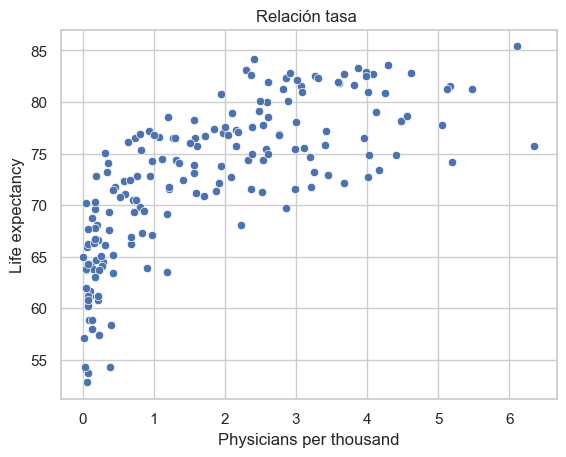

In [108]:
# Ahora graficamos.

sns.set(style='whitegrid')
sns.scatterplot(x='Physicians per thousand', y='Life expectancy', data=df_pregunta5_sin_atipicos, palette='Set2')
plt.xlabel('Physicians per thousand')
plt.ylabel('Life expectancy')
plt.title('Relación tasa ')
plt.show()

In [ ]:
# Existe una relación entre las variables del tipo logaritmica.

In [ ]:
#6. Construye un gráfico para representar la población total de los países y su producto interno bruto. Prepara los datos y escoge el gráfico adecuado (si es necesario, limpia
#y/o transforma los datos). Justifica.

In [186]:
df_pregunta6 = df_final.loc[:,['Population','GDP']]
df_pregunta6.head(2)

,Population,GDP
0,"38,041,754","$19,101,353,833"
1,"2,854,191","$15,278,077,447"


In [175]:
# Convertir GDP variable en numerica.
df_pregunta6['GDP'] = df_pregunta6['GDP'].str.replace('$','').str.replace(',', '')
df_pregunta6['GDP'] = pd.to_numeric(df_pregunta6['GDP'])
df_pregunta6

,Population,GDP
0,"38,041,754",1.910135e+10
1,"2,854,191",1.527808e+10
2,"43,053,054",1.699882e+11
3,"77,142",3.154058e+09
4,"31,825,295",9.463542e+10
...,...,...
190,"28,515,829",4.823593e+11
191,"96,462,106",2.619212e+11
192,"29,161,922",2.691440e+10
193,"17,861,030",2.306472e+10


In [176]:
# Convertir Population variable en numerica.
df_pregunta6['Population'] = df_pregunta6['Population'].str.replace(',', '')
df_pregunta6['Population'] = pd.to_numeric(df_pregunta6['Population'])
df_pregunta6

,Population,GDP
0,38041754.0,1.910135e+10
1,2854191.0,1.527808e+10
2,43053054.0,1.699882e+11
3,77142.0,3.154058e+09
4,31825295.0,9.463542e+10
...,...,...
190,28515829.0,4.823593e+11
191,96462106.0,2.619212e+11
192,29161922.0,2.691440e+10
193,17861030.0,2.306472e+10


In [177]:
df_pregunta6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  194 non-null    float64
 1   GDP         193 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [178]:
# Elimnamos los datos faltantes 
df_pregunta6=df_pregunta6.dropna()
df_pregunta6.apply(lambda x: sum(x.isnull()), axis=0)

Population    0
GDP           0
dtype: int64

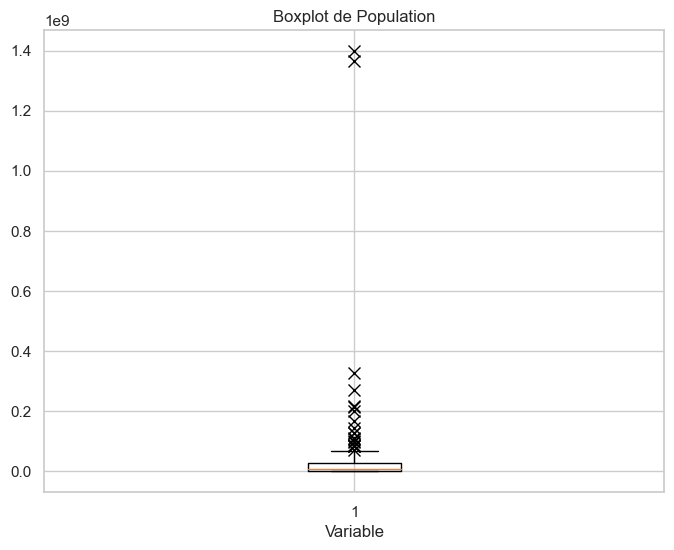

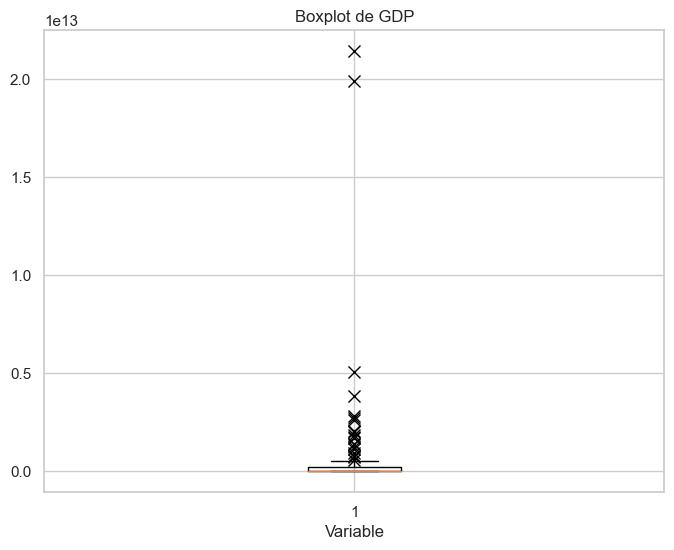

In [179]:
# Analisis de puntos atipicos
plt.figure(figsize=(8, 6))
plt.boxplot(df_pregunta6['Population'], vert=True, flierprops=dict(marker='x', markersize=8, markerfacecolor='red', linestyle='none'))
plt.xlabel('Variable')
plt.title('Boxplot de Population')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df_pregunta6['GDP'], vert=True, flierprops=dict(marker='x', markersize=8, markerfacecolor='red', linestyle='none'))
plt.xlabel('Variable')
plt.title('Boxplot de GDP')
plt.show()

In [181]:
# Eliminamos puntos atipicos
df_pregunta6_sin_atipicos = eliminar_atipicos(df_pregunta6)    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25144\1114629744.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Population', y='GDP', data=df_pregunta6_sin_atipicos, palette='Set2')


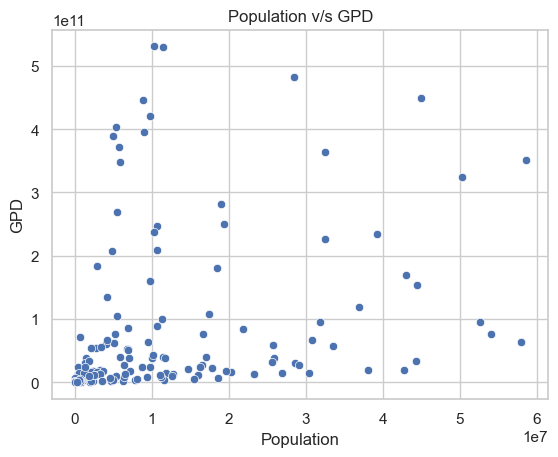

In [183]:
# Ahora graficamos.

sns.set(style='whitegrid')
sns.scatterplot(x='Population', y='GDP', data=df_pregunta6_sin_atipicos, palette='Set2')
plt.xlabel('Population')
plt.ylabel('GPD')
plt.title('Population v/s GPD')
plt.show()

In [ ]:
# No se observa una relación entre las variables.

In [ ]:
#7. Escoge otro par de datos, limpialos, prepáralos y analiza su posible relación. Justifica utilizando las herramientas vistas y gráficos adecuados.

In [ ]:
# Analizaremos Unemployment rate y GDP 

In [206]:
df_pregunta7 = df_final.loc[:,['Unemployment rate','GDP']]
df_pregunta7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unemployment rate  176 non-null    object
 1   GDP                193 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [207]:
# Convertir GDP variable en numerica.
df_pregunta7['GDP'] = df_pregunta7['GDP'].str.replace('$','').str.replace(',', '')
df_pregunta7['GDP'] = pd.to_numeric(df_pregunta7['GDP'])
df_pregunta7.head(2)

,Unemployment rate,GDP
0,11.12%,1.910135e+10
1,12.33%,1.527808e+10


In [208]:
# Convertir Unemployment rate variable en numerica.
df_pregunta7['Unemployment rate'] = df_pregunta7['Unemployment rate'].str.replace('%','').str.replace(',', '')
df_pregunta7['Unemployment rate'] = pd.to_numeric(df_pregunta7['Unemployment rate'])
df_pregunta7.head(2)

,Unemployment rate,GDP
0,11.12,1.910135e+10
1,12.33,1.527808e+10


In [209]:
df_pregunta7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unemployment rate  176 non-null    float64
 1   GDP                193 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [210]:
# Elimnamos los datos faltantes 
df_pregunta7=df_pregunta7.dropna()
df_pregunta7.apply(lambda x: sum(x.isnull()), axis=0)

Unemployment rate    0
GDP                  0
dtype: int64

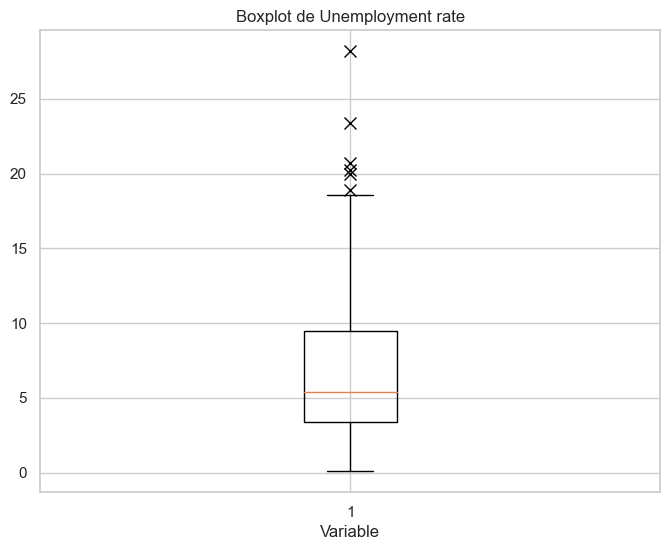

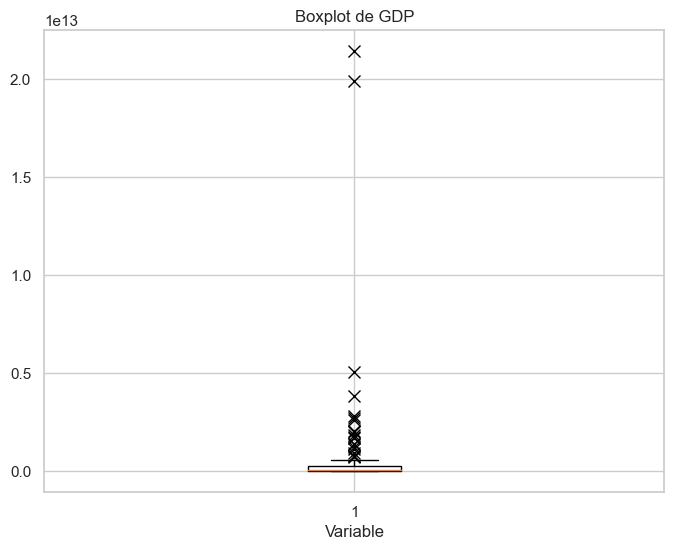

In [211]:
# Analisis de puntos atipicos
plt.figure(figsize=(8, 6))
plt.boxplot(df_pregunta7['Unemployment rate'], vert=True, flierprops=dict(marker='x', markersize=8, markerfacecolor='red', linestyle='none'))
plt.xlabel('Variable')
plt.title('Boxplot de Unemployment rate')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df_pregunta7['GDP'], vert=True, flierprops=dict(marker='x', markersize=8, markerfacecolor='red', linestyle='none'))
plt.xlabel('Variable')
plt.title('Boxplot de GDP')
plt.show()

In [212]:
# Eliminamos puntos atipicos
df_pregunta7_sin_atipicos = eliminar_atipicos(df_pregunta7)    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25144\3303826977.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Unemployment rate', y='GDP', data=df_pregunta7_sin_atipicos, palette='Set2')


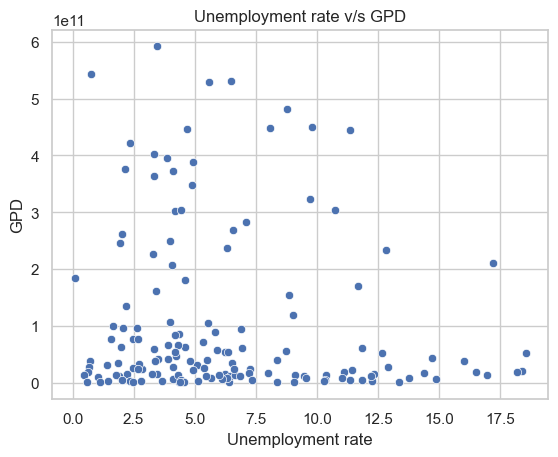

In [215]:
#Ahora graficamos.

sns.set(style='whitegrid')
sns.scatterplot(x='Unemployment rate', y='GDP', data=df_pregunta7_sin_atipicos, palette='Set2')
plt.xlabel('Unemployment rate')
plt.ylabel('GPD')
plt.title('Unemployment rate v/s GPD')
plt.show()

In [ ]:
# No se logra visualizar relación entre las variables al menos visualmente.